<a href="https://colab.research.google.com/github/Tashik-Ahd/AI-ML-Projects/blob/main/CSE428_Lab_Project_Sports_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Sports_dataset_CSE428.zip'

# Directory to extract the contents of the zip file
extract_dir = '/content/dataset'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents of the extracted directory
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)


Mounted at /content/drive
Extracted files: ['test', 'train', 'valid']


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# The transformations for the training, validation, and test sets
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to fit model input
    transforms.RandomHorizontalFlip(p = 0.2),
    transforms.RandomVerticalFlip(p=0.25),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[-0.0932, -0.0971, -0.1260], std=[0.5091, 0.4912, 0.4931])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[-0.0932, -0.0971, -0.1260], std=[0.5091, 0.4912, 0.4931])
])

#Dataset paths
train_data_path = '/content/dataset/train'
valid_data_path = '/content/dataset/valid'
test_data_path = '/content/dataset/test'

# Create datasets
train_dataset = datasets.ImageFolder(root=train_data_path, transform=train_transform)
valid_dataset = datasets.ImageFolder(root=valid_data_path, transform=test_transform)
test_dataset = datasets.ImageFolder(root=test_data_path, transform=test_transform)

batch_size = 32

# Create the DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


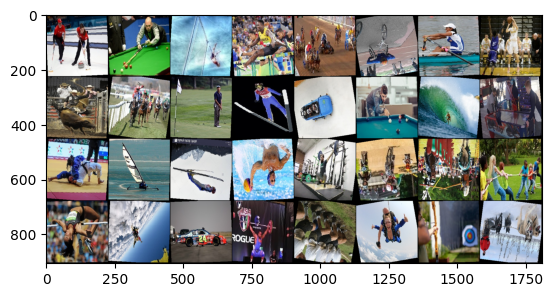

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision


dataiter = iter(train_loader)
images, labels = next(dataiter)

def imshow(img):
    #img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show images
imshow(torchvision.utils.make_grid(images))



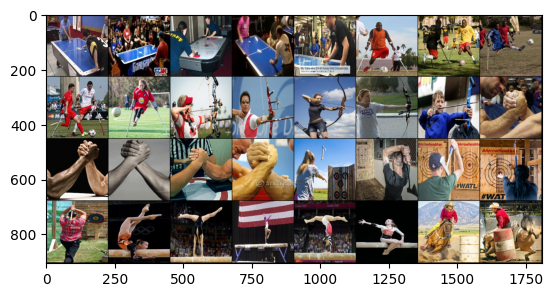

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

dataiter = iter(test_loader)
images, labels = next(dataiter)

def imshow(img):
    #img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show images
imshow(torchvision.utils.make_grid(images))



tensor([65, 62, 95, 50, 51, 43, 90, 96, 11, 61, 19, 52,  6, 72,  8, 79, 36, 75,
        40, 61, 39, 50, 53, 99, 97, 82, 72, 72, 31, 85,  6,  6])


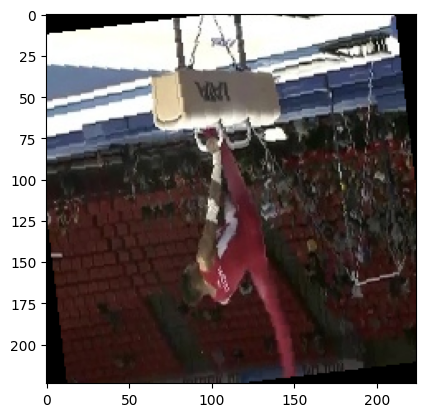

In [ ]:
for i,j in train_loader:
    img = np.transpose(i[0,:,:,:], (1,2,0))
    print(j)
    plt.imshow(img)
    break

tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4,
        4, 5, 5, 5, 5, 5, 6, 6])


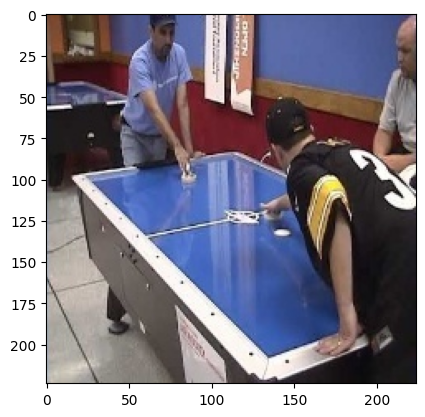

In [ ]:
for i,j in test_loader:
    img = np.transpose(i[0,:,:,:], (1,2,0))
    print(j)
    plt.imshow(img)
    break

In [ ]:
import torch
import torch.nn as nn

class VGG16(nn.Module):
    def __init__(self, num_classes):
        super(VGG16, self).__init__()
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 5
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # Classifier (fully connected layers)
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.classifier(x)
        return x

num_classes = len(train_dataset.classes)
vgg16_scratch = VGG16(num_classes)


In [ ]:
#Loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16_scratch.parameters(), lr=0.0001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16_scratch.to(device)

VGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [ ]:
!pip install torchsummary
# Print summary of the scratch model
from torchsummary import summary
summary(vgg16_scratch, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

Epoch [1/25], Train Loss: 4.4759, Train Accuracy: 0.0196, Val Loss: 4.2806, Val Accuracy: 0.0320
Epoch [2/25], Train Loss: 4.1748, Train Accuracy: 0.0438, Val Loss: 3.9135, Val Accuracy: 0.0720
Epoch [3/25], Train Loss: 3.9331, Train Accuracy: 0.0681, Val Loss: 3.7167, Val Accuracy: 0.1060
Epoch [4/25], Train Loss: 3.7770, Train Accuracy: 0.0897, Val Loss: 3.5564, Val Accuracy: 0.1280
Epoch [5/25], Train Loss: 3.6170, Train Accuracy: 0.1209, Val Loss: 3.4886, Val Accuracy: 0.1420
Epoch [6/25], Train Loss: 3.4554, Train Accuracy: 0.1526, Val Loss: 3.1510, Val Accuracy: 0.1880
Epoch [7/25], Train Loss: 3.2918, Train Accuracy: 0.1820, Val Loss: 2.9701, Val Accuracy: 0.2340
Epoch [8/25], Train Loss: 3.1342, Train Accuracy: 0.2184, Val Loss: 2.8797, Val Accuracy: 0.2560
Epoch [9/25], Train Loss: 2.9982, Train Accuracy: 0.2425, Val Loss: 2.7828, Val Accuracy: 0.2800
Epoch [10/25], Train Loss: 2.8386, Train Accuracy: 0.2752, Val Loss: 2.6726, Val Accuracy: 0.3200
Epoch [11/25], Train Loss: 2.

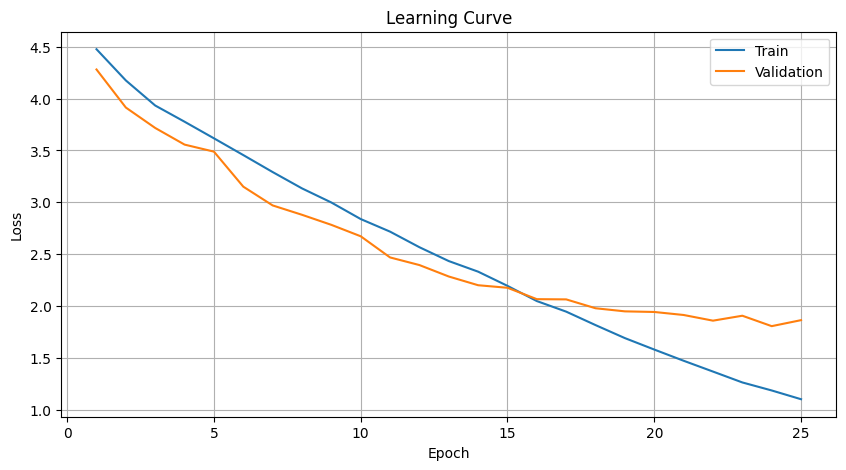

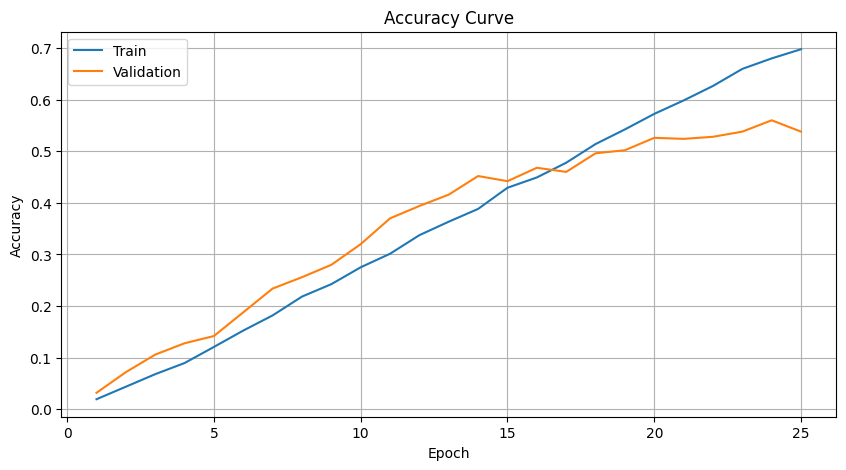

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

#Training
num_epochs = 25
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    vgg16_scratch.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = vgg16_scratch(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(train_dataset)
    epoch_accuracy = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    # Validation
    vgg16_scratch.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = vgg16_scratch(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    epoch_loss = running_loss / len(valid_dataset)
    epoch_accuracy = correct / total
    val_losses.append(epoch_loss)
    val_accuracies.append(epoch_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.4f}")

# Plot learning curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def evaluate_model(model, dataloader):
    model.to(device)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy


In [ ]:
#Test
base_accuracy = evaluate_model(vgg16_scratch, test_loader)
print(base_accuracy)

0.57


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

vgg16_scratch.eval()
true_labels = []
pred_labels = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16_scratch.to(device)

# Evaluation on Test Set
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16_scratch(images)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Compute classification report
class_report = classification_report(true_labels, pred_labels, target_names=train_dataset.classes)


# Print confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 4]]

Classification Report:
                       precision    recall  f1-score   support

           air hockey       0.80      0.80      0.80         5
      ampute football       0.33      0.20      0.25         5
              archery       0.50      0.40      0.44         5
        arm wrestling       1.00      0.80      0.89         5
         axe throwing       0.80      0.80      0.80         5
         balance beam       0.42      1.00      0.59         5
        barell racing       0.60      0.60      0.60         5
             baseball       0.50      0.40      0.44         5
           basketball       0.43      0.60      0.50         5
       baton twirling       0.33      0.20      0.25         5
            bike polo       0.60      0.60      0.60         5
            billiards       0.62      1.00      0.77         5
                  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


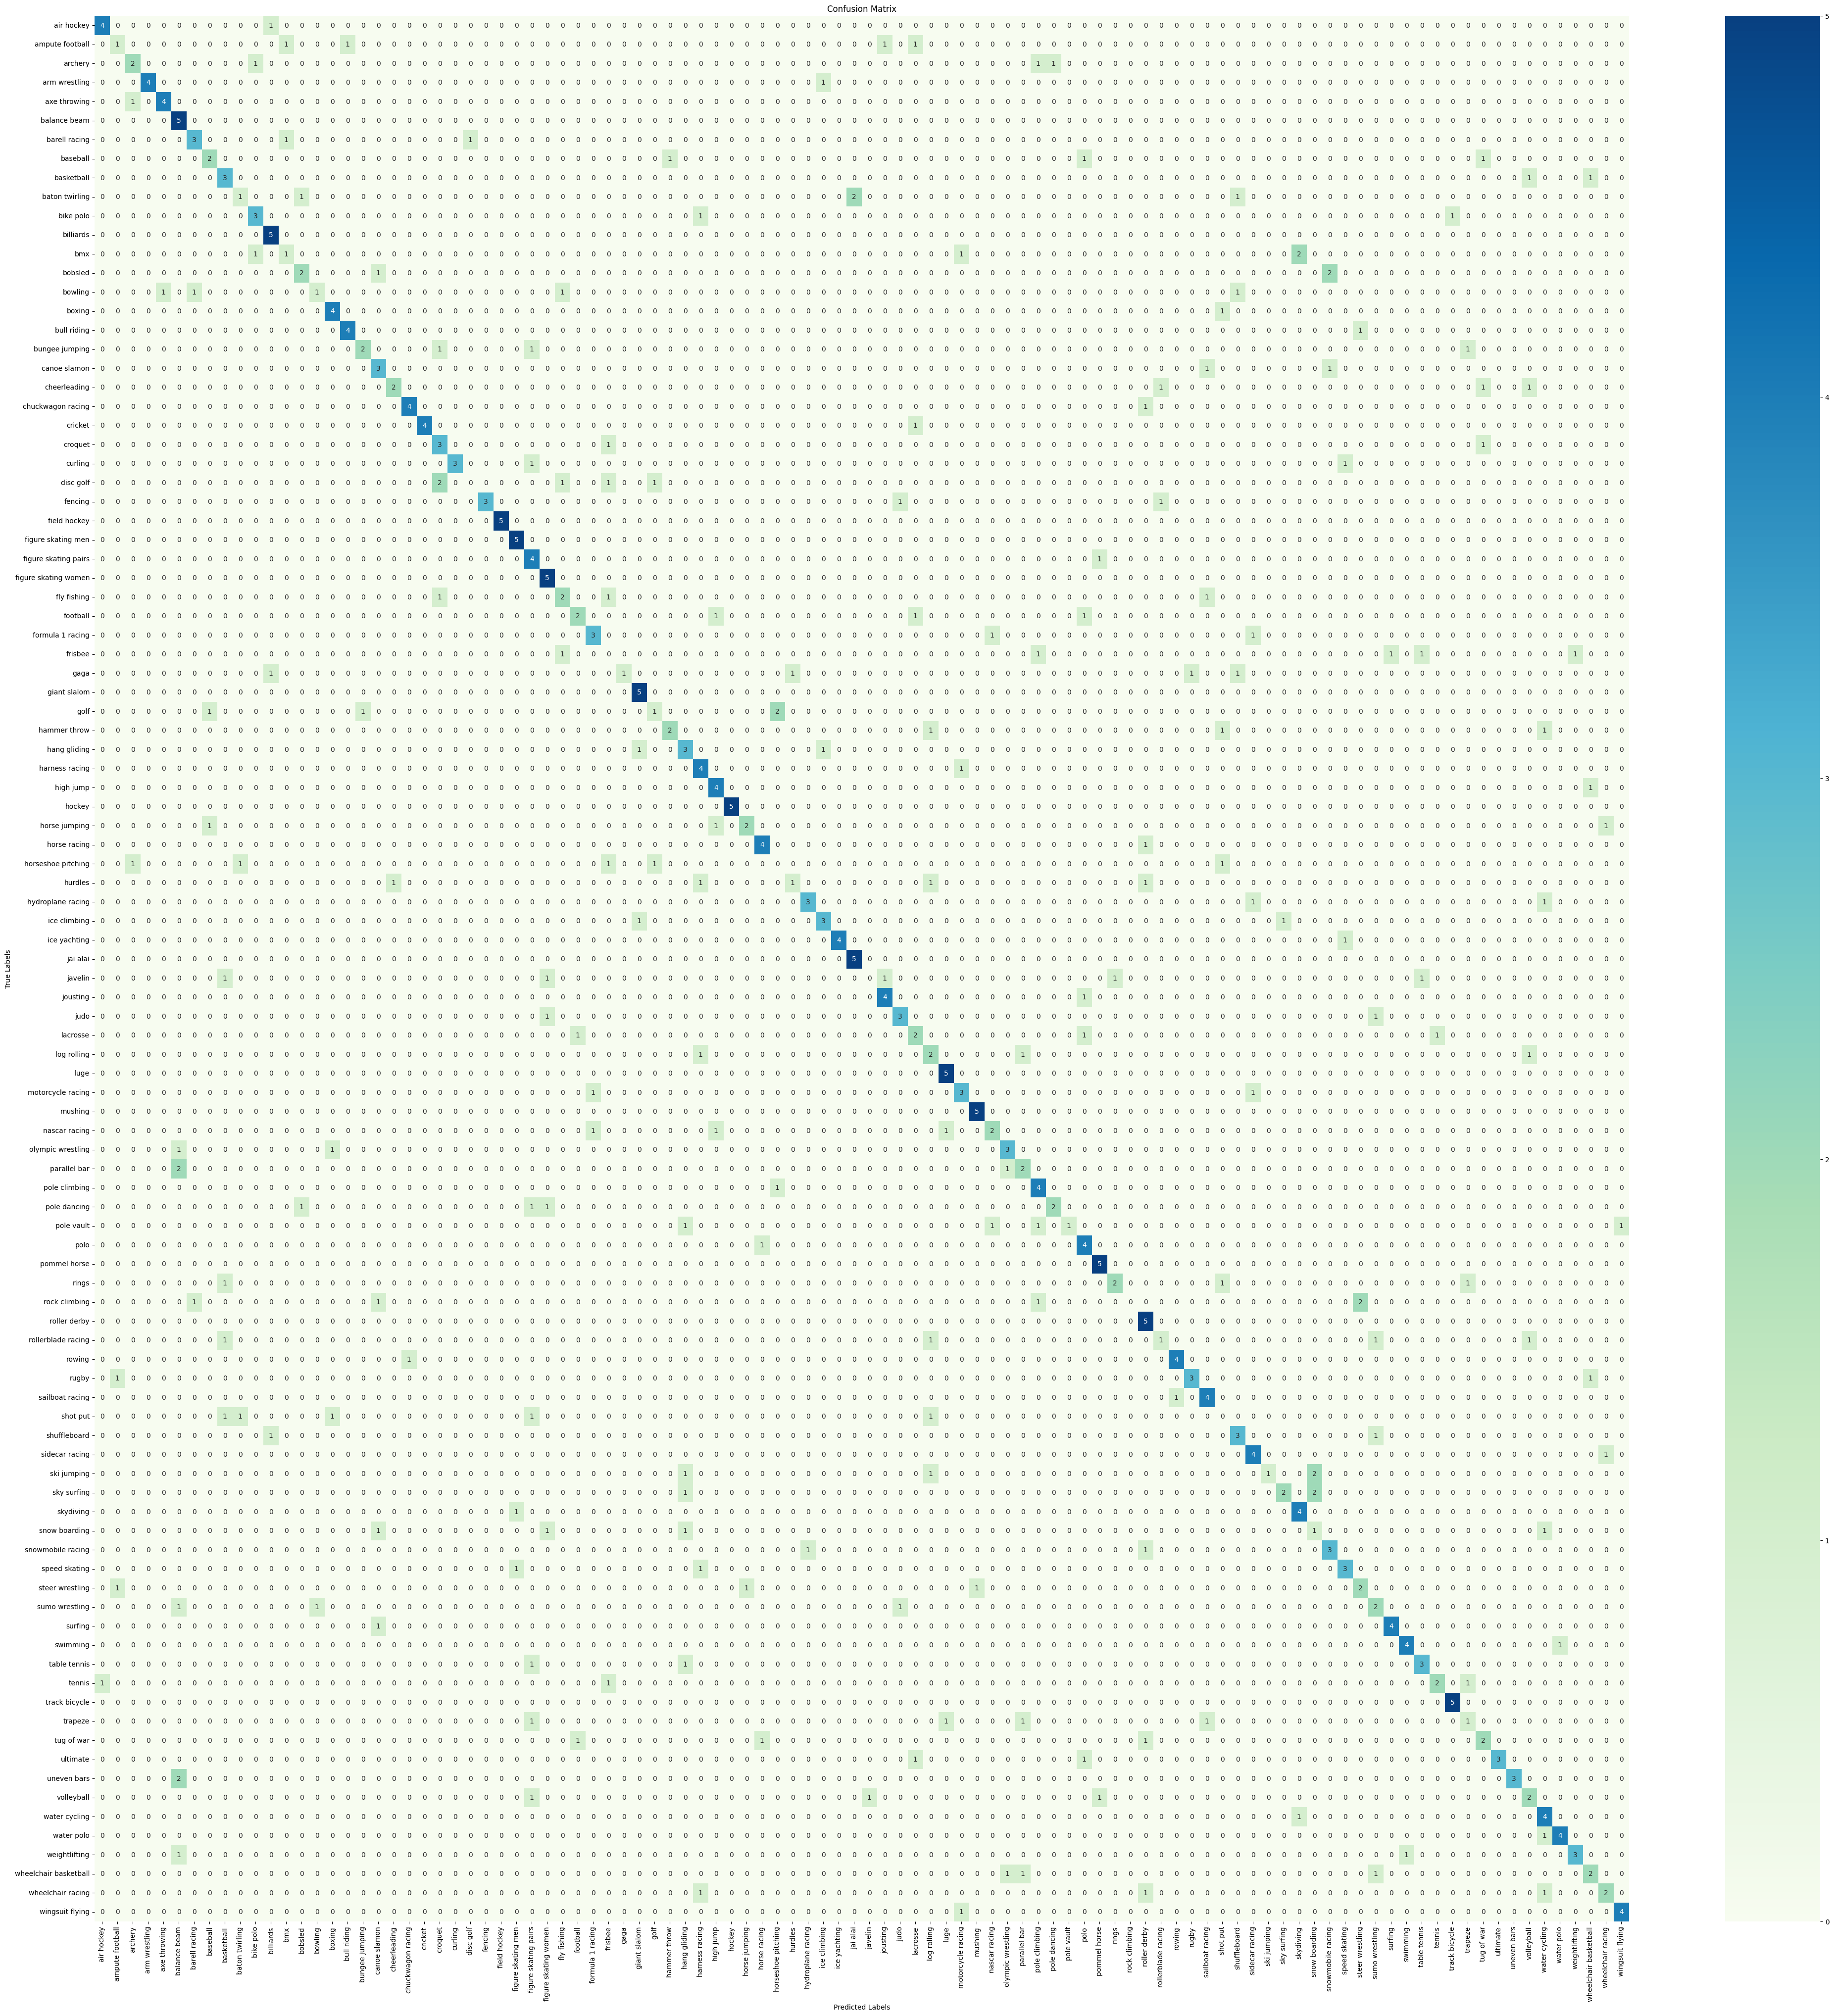

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(50, 50))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='GnBu', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


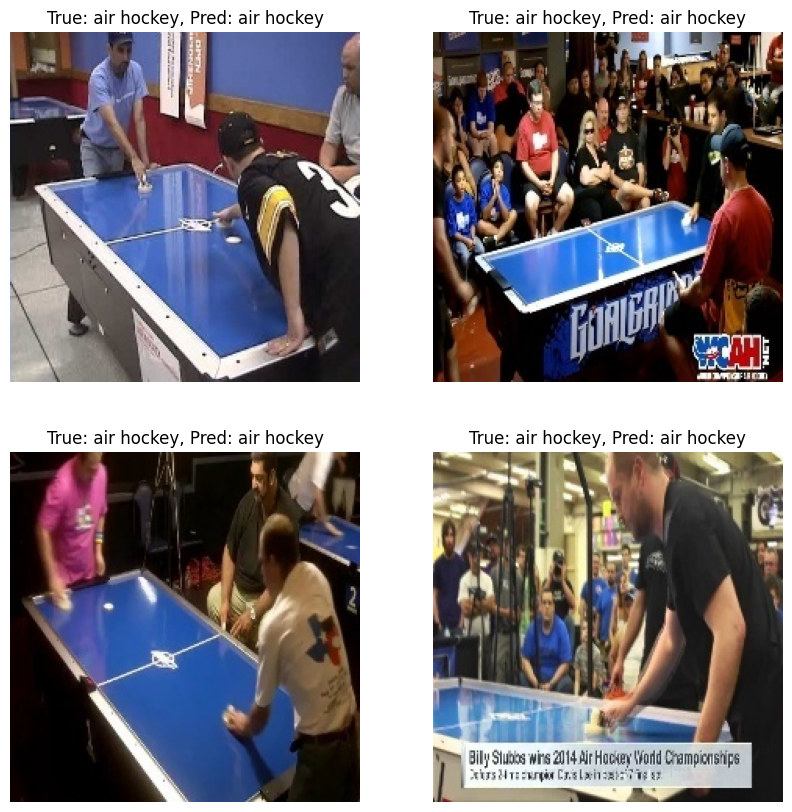

In [ ]:
def plot_good_predictions_classification(model, test_loader, classes):
    model.eval()
    correct_images = []
    correct_labels = []
    predicted_labels = []

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            for i in range(len(preds)):
                if preds[i] == labels[i]:
                    correct_images.append(images[i].cpu()) # Move image back to CPU to resolve error
                    correct_labels.append(classes[labels[i].cpu()])
                    predicted_labels.append(classes[preds[i].cpu()])

    # Plot correct examples
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        if i < len(correct_images):
            ax.imshow(correct_images[i].permute(1, 2, 0))
            ax.set_title(f"True: {correct_labels[i]}, Pred: {predicted_labels[i]}")
            ax.axis("off")
    plt.show()

plot_good_predictions_classification(vgg16_scratch, test_loader, test_dataset.classes)


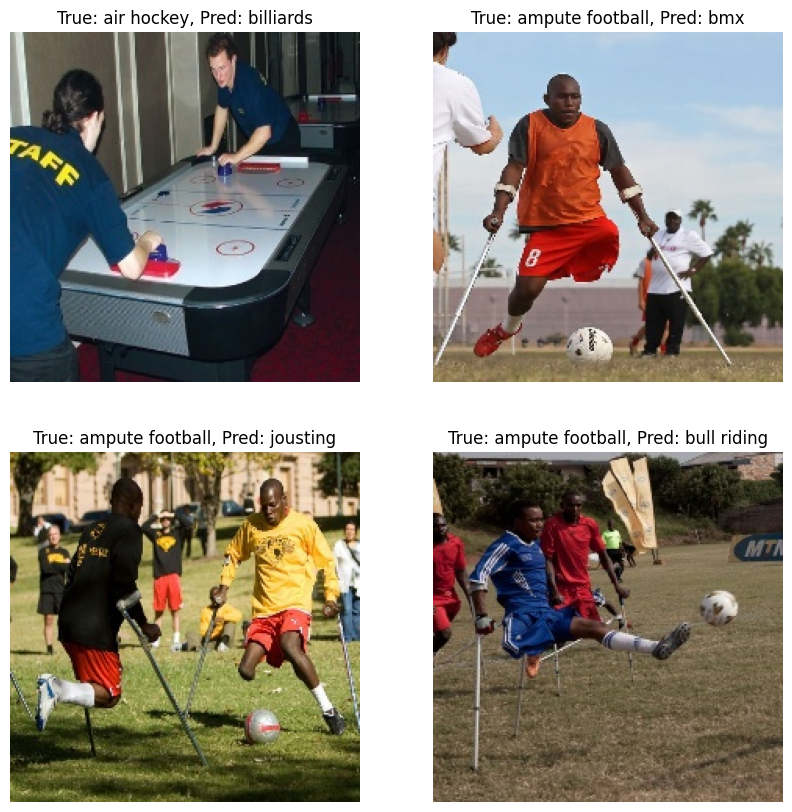

In [ ]:
def plot_bad_predictions_classification(model, test_loader, classes):
    model.eval()
    incorrect_images = []
    true_labels = []
    predicted_labels = []

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            for i in range(len(preds)):
                if preds[i] != labels[i]:  # Condition for incorrect predictions
                    incorrect_images.append(images[i].cpu())
                    true_labels.append(classes[labels[i].cpu()])
                    predicted_labels.append(classes[preds[i].cpu()])

    # Plot incorrect examples
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        if i < len(incorrect_images):
            ax.imshow(incorrect_images[i].permute(1, 2, 0))
            ax.set_title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
            ax.axis("off")
    plt.show()

plot_bad_predictions_classification(vgg16_scratch, test_loader, test_dataset.classes)


#Architecture of VGG-16
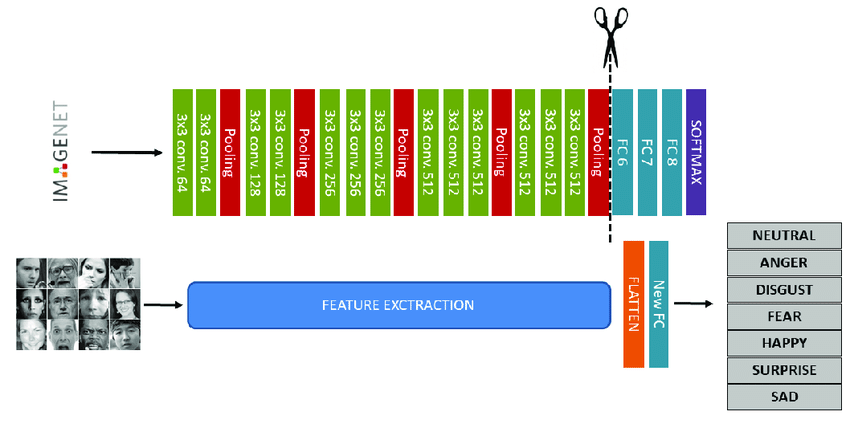

## **Is the performance equally good in all the classes? Which classes are underforming and why?**

### Answer: The model’s performance is not consistent across all the classes, with certain classes underperforming due to factors such as visual similarities between categories or class imbalance in the dataset. For example, underperforming classes may be affected by limited or less diverse samples, causing the model to misclassify due to inadequate feature learning. Bad test examples often involve visually similar samples for example similarity in the background, suggesting the model struggles to distinguish between key variations in some classes, on the other hand, well-classified examples have more distinct features that are easier for the model to recognize. Additionally, early signs of overfitting are evident, with the training accuracy surpassing the validation accuracy, indicating the model may be learning training-specific patterns without generalizing effectively. A potential reason could be insufficient regularization or the complexity of the model. Furthermore, the training curves suggest that the training phase requires additional epochs to stabilize and continue improving performance; in other words, the current training duration is insufficient for full convergence. Extended training, along with techniques such as data augmentation and dropout, may help address overfitting and improve performance across all the classes.